<a href="https://colab.research.google.com/github/s1c5000/kaggle/blob/main/pima-indians-diabetes/7_gradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GradientBoosting
  앙상블 방법론 중 부스팅 계열에 속하는 알고리즘   
  머신러닝 알고리즘 중에서도 가장 예측 성능이 높다고 알려진 알고리즘
  LightGBM, CatBoost, XGBoost 같은 파이썬 패키지들이 모두 Gradient Boosting Algorithm을 구현한 패키지
  앙상블 알고리즘은 bagging과 boosting으로 나눌 수 있고, Gradient boosting은 boosting 계열의 앙상블 알고리즘

  

Boosting이란 약한 분류기를 결합하여 강한 분류기를 만드는 과정입니다.    
분류기 A, B, C 가 있고, 각각의 0.3 정도의 accuracy를 보여준다고 합시다.    
A, B, C를 결합하여 더 높은 정확도, 예를 들어 0.7 정도의 accuracy를 얻는 게 앙상블 알고리즘의 기본 원리입니다.      
Boosting은 이 과정을 순차적으로 실행합니다. A 분류기를 만든 후, 그 정보를 바탕으로 B 분류기를 만들고, 다시 그 정보를 바탕으로 C 분류기를 만듭니다.      
그리고 최종적으로 만들어진 분류기들을 모두 결합하여 최종 모델을 만드는 것이 Boosting의 원리


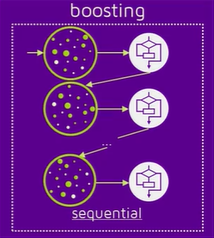

기존의 샘플링에 가중치를 적용해서 다음 샘플링을 하는 것이다

## 데이터 로드와 split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sklearn/diabetes_feature.csv')
df.shape

(768, 16)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [ ]:
x = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan','low_glu_insulin']]
x.shape

(768, 9)

In [ ]:
y = df['Outcome']
y.shape

(768,)

sklearn에서 제공하는 model_selection의 train_test_split으로 테스트와 학습 나누어 보겠다

In [ ]:
# random 하게 세트들을 가져온다
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,28.2,1.282,50,True,169.5,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,102.5,False
231,134,80,37,46.2,0.238,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,140.0,False
106,96,122,0,22.4,0.207,27,False,102.5,True
270,101,86,37,45.6,1.136,38,True,169.5,False
435,141,0,0,42.4,0.205,29,False,169.5,False


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 9), (614,), (154, 9), (154,))

## 학습과 예측

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_predict = model.predict(X_test)

## 정확도 측정

In [ ]:
# DecisionTree 사용했을 때는 28
# randomForest사용하니 20개로 줄었다
# GradientBoosting 은 24개이다

different_count = (y_predict != y_test).sum()
different_count

24

In [ ]:
(len(y_test)-different_count)/len(y_test) * 100

84.4155844155844

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.8441558441558441

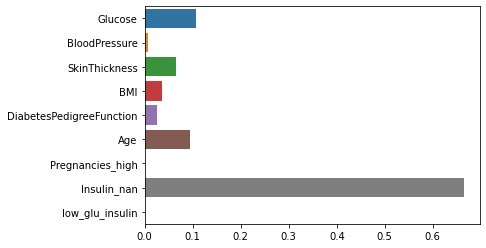

In [ ]:
feature_names = X_train.columns.to_list()

import seaborn as sns
sns.barplot(x = model.feature_importances_, y=feature_names)

랜덤포레스트는 시각화 할 수 없다.    
위의 코드는 n_estimators가 기본값인 100 인데 100개의 tree를 시각화 할 수 없기 때문이다